# Task A

**Problem:** select 3 models to predict NBA player salary
1. linear regression model
2. KNN regression model
3. Lasso regression

**Data:** NBA_Train.csv, NBA_Test.csv

**Metadata:** https://stats.nba.com/help/glossary/

**Resonse variable:** Salary

**Performance metric:** Root mean squared error (RMSE) < 4.1 ($Millions) --  at least 2/3 models have to achieve this goal




# Data processing and EDA

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

sns.set_context('notebook')
%matplotlib inline
sns.set_style("darkgrid")

In [2]:
NBA_train = pd.read_csv('NBA_Train.csv')
NBA_test = pd.read_csv('NBA_Test.csv')

In [3]:
# NBA_train.info()
NBA_train.describe().round(4)

,Train_ID,SALARY,Age,Games,Minutes,PER,TS,ORB,DRB,TRB,AST,STL,BLK,TOV,USG,ORtg,DRtg,OWS,DWS,WS
count,126.0000,126.0000,126.0000,126.0000,126.0000,126.0000,126.0000,126.0000,126.0000,126.0000,126.0000,126.0000,126.0000,126.0000,126.0000,126.0000,126.0000,126.0000,126.0000,126.0000
mean,63.5000,6.7842,26.6825,69.4603,1809.0159,14.9643,0.5425,5.1548,15.1167,10.1365,14.4571,1.5873,1.5222,13.4865,19.9897,107.1825,106.8651,2.3373,1.8397,4.1825
std,36.5171,5.6479,4.0805,11.4330,703.5615,4.3063,0.0457,3.8254,6.0185,4.6266,9.8211,0.6176,1.3595,4.1566,4.9621,7.5899,3.6799,2.6395,1.1787,3.4027
min,1.0000,0.1114,19.0000,40.0000,393.0000,6.3000,0.4460,1.0000,6.2000,4.1000,2.1000,0.2000,0.0000,7.2000,9.3000,88.0000,97.0000,-0.9000,0.0000,-0.1000
25%,32.2500,2.3852,23.0000,62.0000,1290.2500,12.4250,0.5100,2.1250,10.1250,6.0250,7.0250,1.1250,0.6000,10.4000,16.4250,102.0000,104.0000,0.6000,0.9000,1.7250
50%,63.5000,4.5000,26.0000,72.5000,1859.0000,14.0000,0.5400,3.7000,13.8000,9.2000,11.2500,1.5000,1.1000,12.5000,19.1000,107.0000,107.0000,1.6500,1.6000,3.1500
75%,94.7500,9.5914,29.0000,79.0000,2405.0000,16.7500,0.5678,7.3000,19.2000,13.9000,19.9750,2.0000,1.8750,15.5000,23.2750,112.0000,110.0000,3.3000,2.4750,5.5750
max,126.0000,22.9705,37.0000,82.0000,3122.0000,29.8000,0.7300,17.5000,32.1000,22.3000,44.3000,3.8000,7.4000,28.8000,33.0000,130.0000,115.0000,14.8000,6.4000,19.2000


In [4]:
NBA_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Train_ID  126 non-null    int64  
 1   SALARY    126 non-null    float64
 2   POSITION  126 non-null    object 
 3   TEAM      126 non-null    object 
 4   Age       126 non-null    int64  
 5   Games     126 non-null    int64  
 6   Minutes   126 non-null    int64  
 7   PER       126 non-null    float64
 8   TS        126 non-null    float64
 9   ORB       126 non-null    float64
 10  DRB       126 non-null    float64
 11  TRB       126 non-null    float64
 12  AST       126 non-null    float64
 13  STL       126 non-null    float64
 14  BLK       126 non-null    float64
 15  TOV       126 non-null    float64
 16  USG       126 non-null    float64
 17  ORtg      126 non-null    int64  
 18  DRtg      126 non-null    int64  
 19  OWS       126 non-null    float64
 20  DWS       126 non-null    float6

import pandas as pd 
import missingno as msno 
msno.bar(NBA_train)


In [5]:
NBA_train.drop('Train_ID',1).corr().round(3).sort_values('SALARY')

,SALARY,Age,Games,Minutes,PER,TS,ORB,DRB,TRB,AST,STL,BLK,TOV,USG,ORtg,DRtg,OWS,DWS,WS
DRtg,-0.266,-0.117,-0.109,-0.022,-0.301,-0.099,-0.482,-0.572,-0.583,0.144,-0.077,-0.491,-0.115,-0.069,-0.058,1.000,-0.101,-0.717,-0.326
TOV,-0.126,0.069,-0.171,-0.220,-0.200,-0.034,0.118,-0.034,0.029,0.350,0.249,0.117,1.000,-0.318,-0.222,-0.115,-0.212,-0.065,-0.188
ORB,-0.045,-0.079,-0.038,-0.283,0.120,0.046,1.000,0.752,0.902,-0.500,-0.346,0.638,0.118,-0.171,0.088,-0.482,-0.086,0.115,-0.028
BLK,-0.040,-0.035,-0.097,-0.235,0.098,0.138,0.638,0.601,0.655,-0.447,-0.297,1.000,0.117,-0.187,0.031,-0.491,-0.118,0.146,-0.043
Age,0.054,1.000,-0.131,-0.011,0.103,0.230,-0.079,0.052,0.005,0.085,-0.007,-0.035,0.069,0.032,0.168,-0.117,0.045,0.077,0.061
TRB,0.097,0.005,-0.061,-0.204,0.270,0.026,0.902,0.962,1.000,-0.456,-0.359,0.655,0.029,0.007,0.036,-0.583,0.006,0.249,0.088
STL,0.172,-0.007,-0.011,0.195,0.148,0.038,-0.346,-0.328,-0.359,0.452,1.000,-0.297,0.249,0.037,0.062,-0.077,0.121,0.211,0.168
DRB,0.173,0.052,-0.069,-0.132,0.334,0.002,0.752,1.000,0.962,-0.384,-0.328,0.601,-0.034,0.113,-0.005,-0.572,0.056,0.298,0.144
Games,0.205,-0.131,1.000,0.699,0.219,0.222,-0.038,-0.069,-0.061,0.054,-0.011,-0.097,-0.171,0.138,0.283,-0.109,0.388,0.489,0.470
TS,0.210,0.230,0.222,0.237,0.496,1.000,0.046,0.002,0.026,-0.024,0.038,0.138,-0.034,0.032,0.859,-0.099,0.608,0.216,0.545


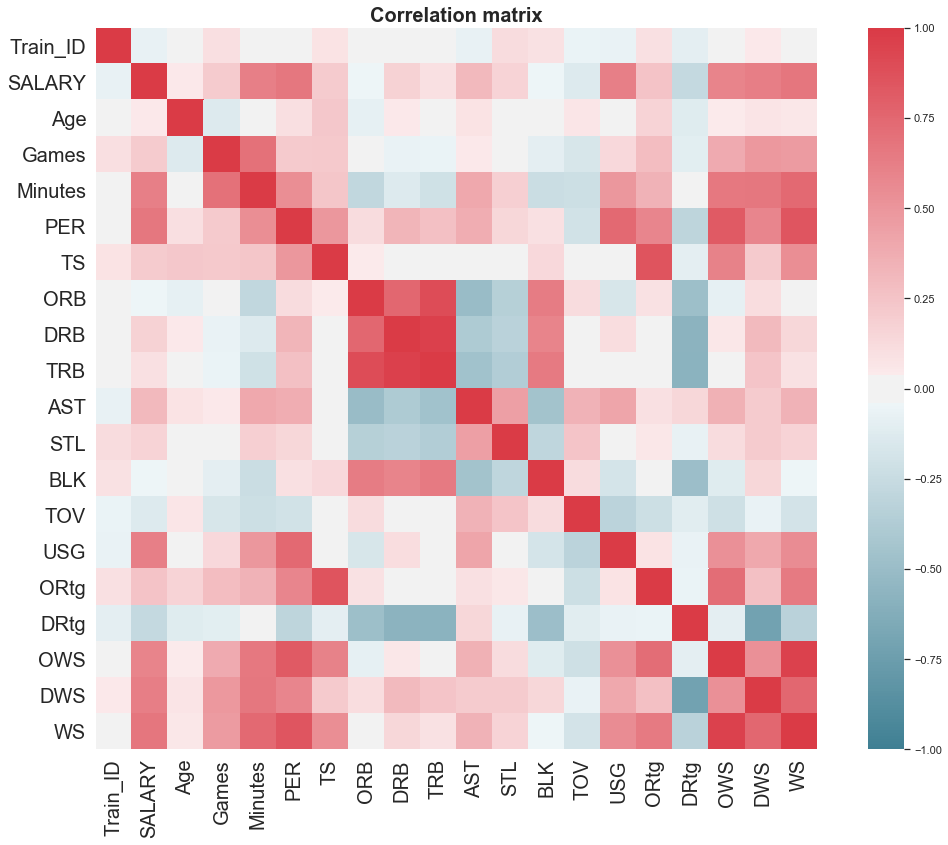

In [6]:
from pandas.api.types import is_numeric_dtype
variables = []
for i in list(NBA_train.columns):
    if is_numeric_dtype(NBA_train[i]) == True:
        variables.append(i)
        
fig, ax = plt.subplots()

cmap = sns.diverging_palette(220, 10, as_cmap= True)
sns.heatmap(NBA_train.corr(), vmax=1, vmin=-1, center=0, square=True, ax=ax, cmap=cmap)
ax.set_title('Correlation matrix', fontweight='bold', fontsize=20)
plt.tight_layout()
fig.set_size_inches(15,15)
plt.xticks(np.arange(0.5,len(variables),1),variables,fontsize=20)
plt.yticks(np.arange(0.5,len(variables),1),variables,fontsize=20)
plt.savefig('correlation matrix.png')

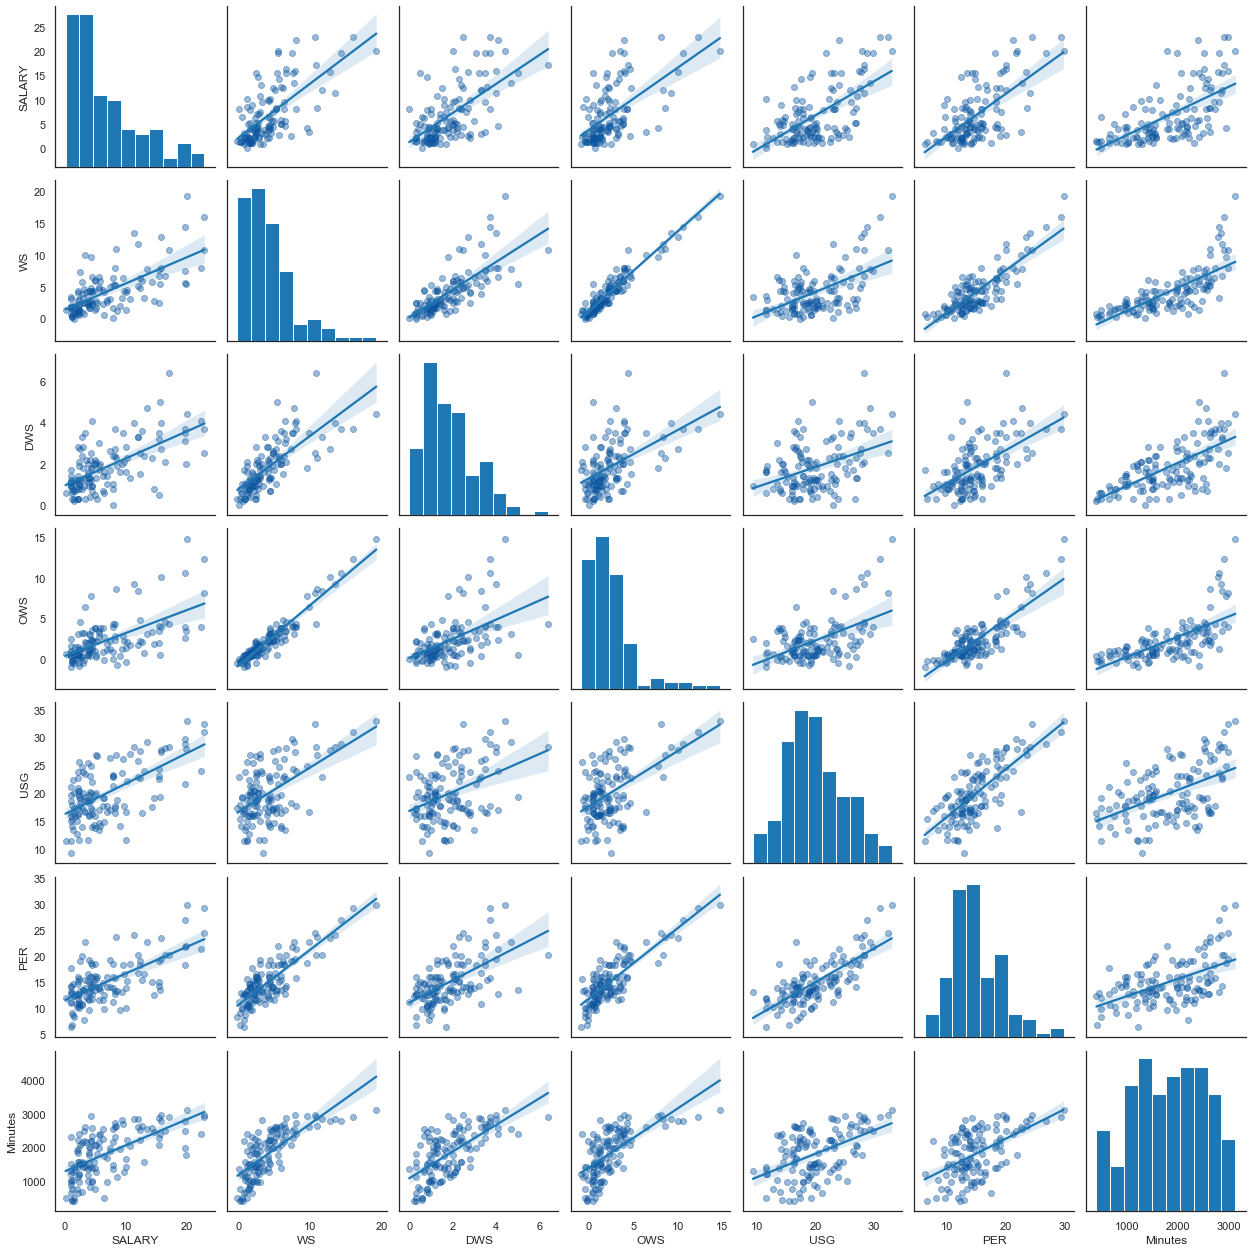

In [7]:
with sns.axes_style('white'):
    g=sns.pairplot(NBA_train[['SALARY','WS','DWS','OWS','USG','PER','Minutes']], kind='reg',
    plot_kws={'scatter_kws' :{'color': sns.color_palette('Blues')[-1], 'alpha':
    0.4}})
plt.tight_layout()
plt.savefig('scatter.png')

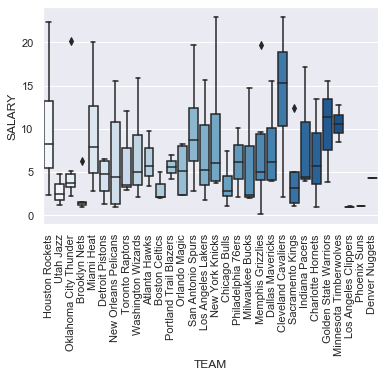

In [8]:
plot = sns.boxplot(x=NBA_train['TEAM'], y=NBA_train['SALARY'], palette='Blues')
ax.set_xlabel('Team')
ax.set_ylabel('Salary')
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plt.show()
# plt.savefig('team_box.png')

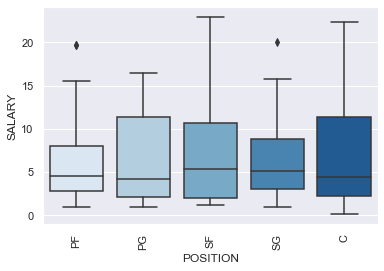

In [9]:
plot = sns.boxplot(x=NBA_train['POSITION'], y=NBA_train['SALARY'], palette='Blues')
ax.set_xlabel('POSITION')
ax.set_ylabel('Salary')
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plt.show()


# Feature engineering

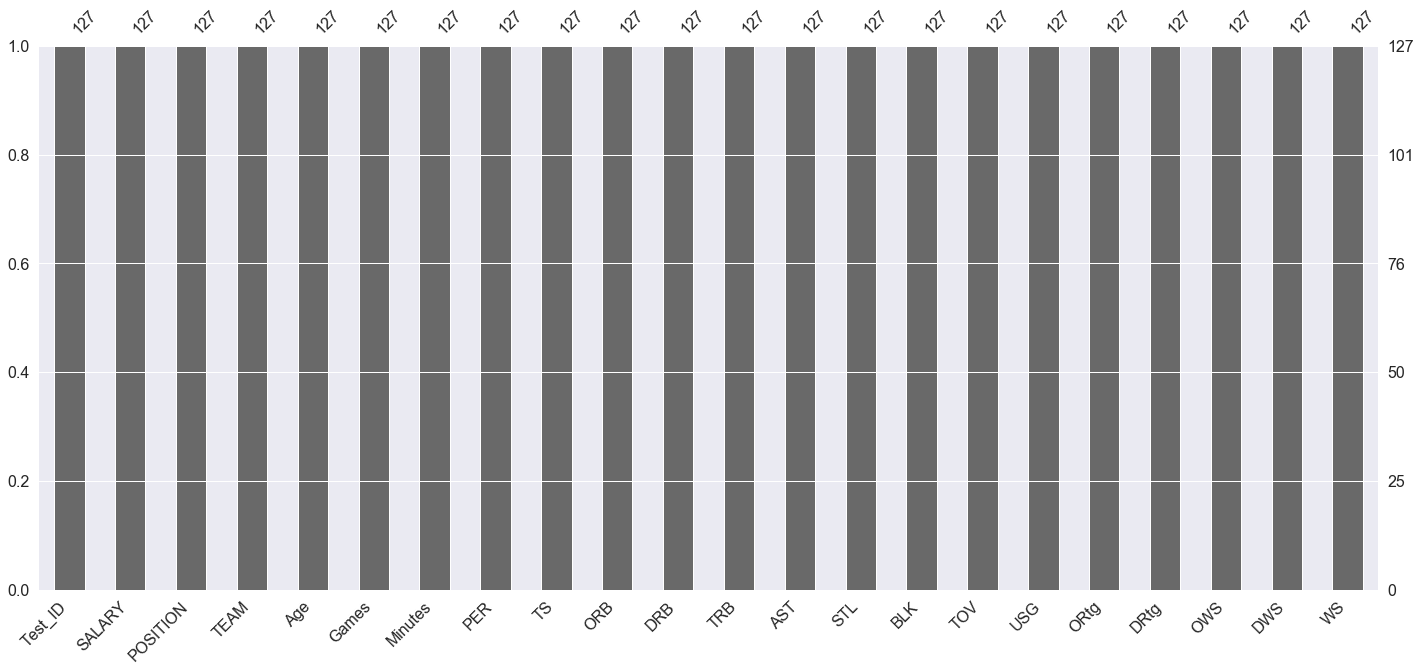

In [10]:
import missingno as msno 
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots()
msno.bar(NBA_test)

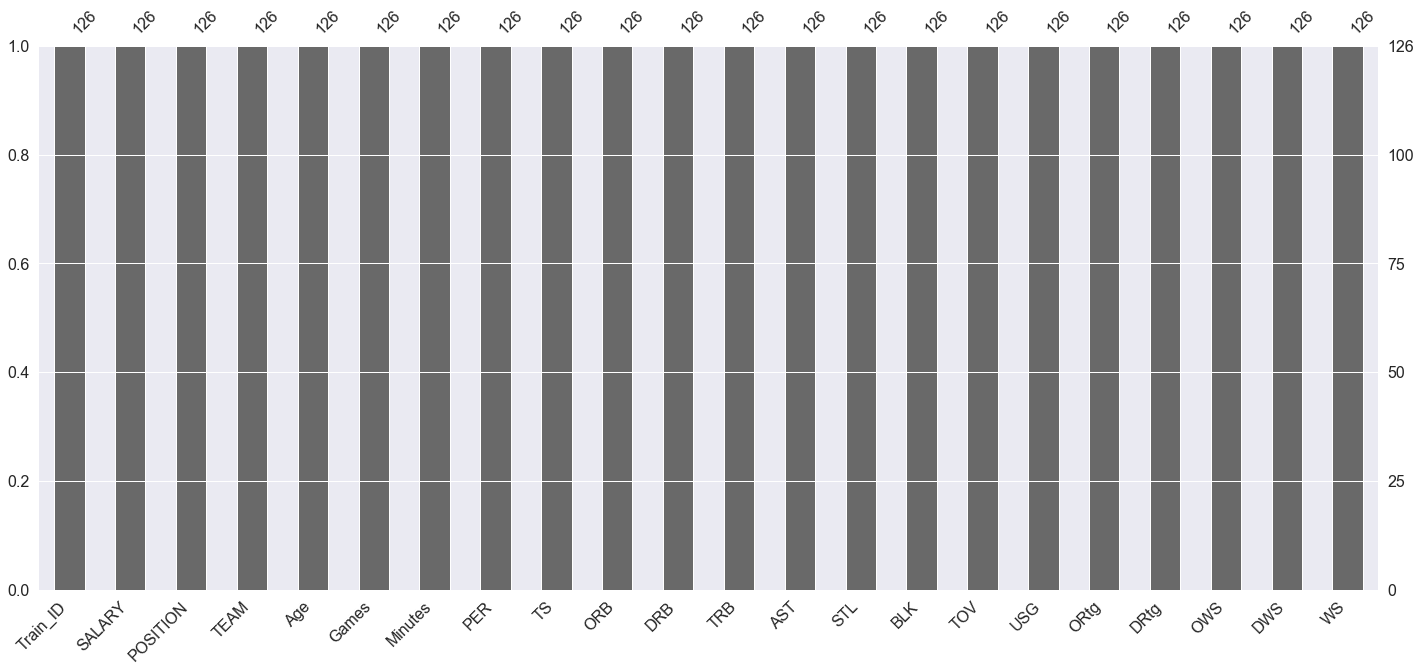

In [11]:
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots()
msno.bar(NBA_train)

In [12]:
NBA_train=NBA_train.drop(['TEAM','Train_ID','POSITION'],1)
NBA_test=NBA_test.drop(['TEAM','Test_ID','POSITION'],1)

In [13]:
Y = NBA_train['SALARY']
X = NBA_train.drop(['SALARY'],1)
Y_test = NBA_test['SALARY']
X_test = NBA_test.drop(['SALARY'],1)

# Methodology of KNN

In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [15]:
min_mseKNN = np.inf
knn_models = []

kf = KFold(5,random_state=1)
for var in X:
    for k in range(1,50):

        knn = KNeighborsRegressor(n_neighbors= k) 
        knn = knn.fit(X[[var]], Y)
        
        
        knn_scores = cross_val_score(knn, X[[var]],Y, cv = kf, scoring='neg_mean_squared_error')
        val_knn = np.sqrt(-np.mean(knn_scores))
        
        if val_knn < min_mseKNN:
            min_mseKNN = val_knn
            feature_knn = var
            best_k = k
            knn_predTest = knn.predict(X_test[[var]])
            test_scoreKNN = np.sqrt(mean_squared_error(Y_test, knn_predTest))
        
        knn_models.append([var,k,val_knn])

knn_models = pd.DataFrame(knn_models,columns=['Variable','Polynomial degree','Validation error'])

print("Variable selected:",feature_knn)
print("Value of K:",best_k)
print("Validation root mean square error:",min_mseKNN.round(4))
print("Test root mean square error:",test_scoreKNN.round(4))

Variable selected: WS
Value of K: 19
Validation root mean square error: 4.2615
Test root mean square error: 4.2288


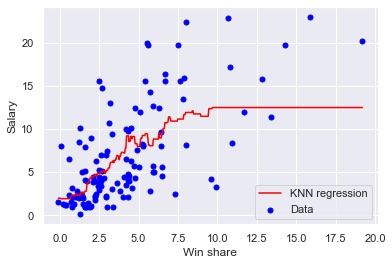

In [16]:
knn = KNeighborsRegressor(n_neighbors=19)
knn.fit(X_test[['WS']],Y_test)

x = np.linspace(X['WS'].min(),X['WS'].max(), 500).reshape((-1,1))
pred = knn.predict(x)

fig, ax = plt.subplots()
ax.scatter(X[['WS']],Y,color="blue",label='Data',s=25)
ax.set_xlabel('Win share')
ax.set_ylabel('Salary')
ax.plot(x,pred, color="red",alpha=1,label="KNN regression")
plt.axis('tight')
plt.legend()
plt.show()
# plt.savefig('knn_plot.png')

In [17]:
knn = knn_models.sort_values("Validation error")

# Methodology of Linear regression

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
import statsmodels.formula.api as smf

In [19]:
# polynomial linear regression model
models = []
min_mse = np.inf

kf = KFold(5,random_state=1)
for var in X:
    for i in range(1,11): # number of degree
        
        poly_transformer = PolynomialFeatures(i) 

        poly_x = poly_transformer.fit_transform(X[[var]])
        poly_reg = LinearRegression()
        poly_reg = poly_reg.fit(poly_x,Y)

        poly_scores = cross_val_score(poly_reg, poly_x, Y, cv = kf,scoring='neg_mean_squared_error')
        val_score = np.sqrt(-np.mean(poly_scores)) # positive root mean squared error

        if val_score < min_mse:
            min_mse = val_score
            feature = var
            deg = i
            poly_x_test = poly_transformer.fit_transform(X_test[[var]])
            Y_predTest = poly_reg.predict(poly_x_test)
            test_score = np.sqrt(mean_squared_error(Y_test, Y_predTest))
            coef = poly_reg.coef_
            intercept = poly_reg.intercept_
    
        models.append([var,i,val_score])

poly_models = pd.DataFrame(models,columns=['Variable','Polynomial degree','Validation error'])

print("Variable selected:",feature)
print("Maximum polynomial degree:",deg)
print("Validation CV score:",min_mse.round(4))
print("Test root mean square error:",test_score.round(4))
print("Model:",coef)
print(intercept)

Variable selected: WS
Maximum polynomial degree: 2
Validation CV score: 4.1927
Test root mean square error: 4.0804
Model: [ 0.          1.43387243 -0.02189051]
1.4213307786394145


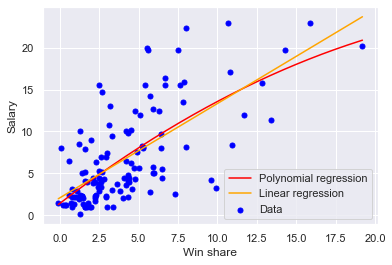

<Figure size 432x288 with 0 Axes>

In [20]:
# plot of polynomial model
poly_transformer = PolynomialFeatures(2) 
poly_2 = poly_transformer.fit_transform(X[['WS']])
poly_reg = LinearRegression()
poly_reg = poly_reg.fit(poly_2,Y)

poly_x = poly_transformer.fit_transform(x)
pred_poly = poly_reg.predict(poly_x)

lin_reg = LinearRegression()
lin_reg = lin_reg.fit(X[['WS']],Y)
pred_lin = lin_reg.predict(x)

fig, ax = plt.subplots()
ax.scatter(X[['WS']],Y,color="blue",label='Data',s=25)
ax.set_xlabel('Win share')
ax.set_ylabel('Salary')
ax.set_xlim(0, 20)
ax.plot(x,pred_poly, color="red",alpha=1,label="Polynomial regression")
ax.plot(x,pred_lin, color="orange",alpha=1,label="Linear regression")
plt.axis('tight')
plt.legend()
plt.show()
# plt.savefig('poly_plot.png')

In [21]:
poly_models.sort_values('Validation error')

,Variable,Polynomial degree,Validation error
171,WS,2,4.192749
175,WS,6,4.199745
121,USG,2,4.203404
31,PER,2,4.207617
172,WS,3,4.216999
...,...,...,...
168,DWS,9,985.589612
179,WS,10,1303.246660
109,BLK,10,1420.591097
159,OWS,10,1768.511097


In [22]:
# mlr with Recursive Feature Elimination
Y_mlr = NBA_train['SALARY']
X_mlr = NBA_train.drop(['SALARY','DWS','OWS','DRB','ORB'],1)
Y_test = NBA_test['SALARY']
X_test = NBA_test.drop(['SALARY','DWS','OWS','DRB','ORB'],1)

models = []
var_count = len(list(X_mlr.columns))+1
kf = KFold(5,random_state = 1)

min_mseMLR = np.inf
mlr_models = []
for i in range(1,var_count):

    estimator = SVR(kernel="linear")
    mlr = RFE(estimator, n_features_to_select=i, step=1)
    mlr = mlr.fit(X_mlr,Y_mlr)
    
    mlr_scores = cross_val_score(mlr,X_mlr,Y_mlr, cv=kf,scoring='neg_mean_squared_error')
    mlr_score = np.sqrt(-np.mean(mlr_scores))
    
    if mlr_score < min_mseMLR:
        min_mseMLR = mlr_score
        
        var = []
        var_index = np.where(mlr.support_==True)[0]
        for index in var_index:
            var.append(list(X_mlr.columns)[index])
        
        mse_val = mlr_score
        
        Y_predTest = mlr.predict(X_test)
        mse_test = np.sqrt(mean_squared_error(Y_test, Y_predTest))
        
    models.append([var, mse_val, mse_test])
    
mlr_models = pd.DataFrame(models, columns=['Variables','Validation error','Test error']).sort_values('Validation error')

In [25]:
print("Features selected:",var)
print("Validation error",mse_val.round(4))
print("Test error:",mse_test.round(4))

mlr_best = SVR(kernel="linear").fit(X_mlr[['Age', 'Games', 'Minutes', 'PER', 'TS', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'USG', 'ORtg', 'DRtg', 'WS']],Y_mlr)
print("Coefficients:",list(zip(var,mlr_best.coef_[0].round(4))))
print("Intercept:",mlr_best.intercept_[0].round(2))

Features selected: ['Age', 'Games', 'Minutes', 'PER', 'TS', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'USG', 'ORtg', 'DRtg', 'WS']
Validation error 3.792
Test error: 4.0532
Coefficients: [('Age', -0.0958), ('Games', -0.1639), ('Minutes', 0.0037), ('PER', -0.2526), ('TS', -0.0978), ('TRB', 0.1953), ('AST', -0.0619), ('STL', 0.5847), ('BLK', -0.2115), ('TOV', 0.1202), ('USG', 0.5117), ('ORtg', 0.109), ('DRtg', -0.1929), ('WS', 0.4901)]
Intercept: 10.53


# Methodology of Lasso regression

In [26]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
alphas = [.0001,.001, 0.01,0.1, 0.5, 5, 10]

Y_lasso = NBA_train['SALARY']
X_lasso = NBA_train.drop(['SALARY'],1)
Y_test = NBA_test['SALARY']
X_test = NBA_test.drop(['SALARY'],1)

lasso = Lasso()
parameters = {'alpha':[.0001,.001, 0.01,0.1, 0.5, 5, 10]}

lasso_reg = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error',cv=kf)
lasso_reg.fit(X_lasso,Y_lasso)

Y_lassoTest = lasso_reg.predict(X_test)
lasso_test = np.sqrt(mean_squared_error(Y_test, Y_lassoTest))

print("Best alpha:",lasso_reg.best_params_['alpha'])
print("Negative mean squared error:",lasso_reg.best_score_.round(4))
print("Validation root mean squared error:",np.sqrt(-lasso_reg.best_score_).round(4))
print("Test root mean squared error:", lasso_test.round(4))

lasso_best = Lasso(0.5).fit(X_lasso,Y_lasso)
print("Coefficients:", list(zip(list(X_lasso.columns),lasso_best.coef_.round(4))))
print("Intercept:",lasso_best.intercept_.round(4))

Best alpha: 0.5
Negative mean squared error: -12.8575
Validation root mean squared error: 3.5857
Test root mean squared error: 3.957
Coefficients: [('Age', -0.0044), ('Games', -0.1822), ('Minutes', 0.0056), ('PER', 0.1019), ('TS', 0.0), ('ORB', 0.0), ('DRB', 0.0356), ('TRB', 0.0), ('AST', -0.0543), ('STL', 0.0), ('BLK', -0.0), ('TOV', 0.0981), ('USG', 0.2748), ('ORtg', 0.0), ('DRtg', -0.2296), ('OWS', 0.0), ('DWS', 0.0), ('WS', 0.1696)]
Intercept: 25.1785


# Task B

# Exploratory data analysis

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
data = pd.read_csv('Boston_housing_data.csv')
X = data[['rm','dis','tax']]
y = np.array(data[["medv"]])

X = (X-X.mean(axis=0))/X.std(axis=0)
y = (y-y.mean(axis=0))/y.std(axis=0)
# Adding constant
X = np.column_stack((np.ones(len(X)), X))

In [28]:
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


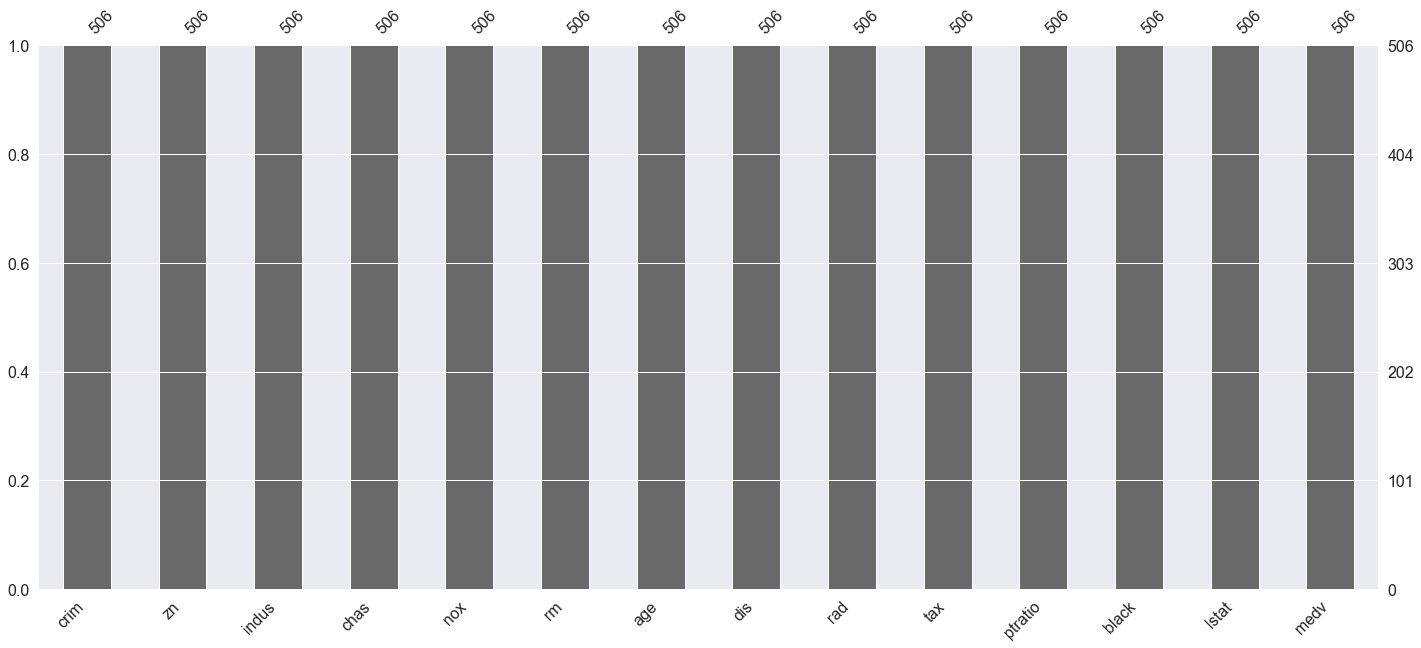

In [29]:
fig, ax = plt.subplots()
msno.bar(data)

([<matplotlib.axis.YTick at 0x1a25f0fc10>,
 <a list of 14 Text yticklabel objects>)

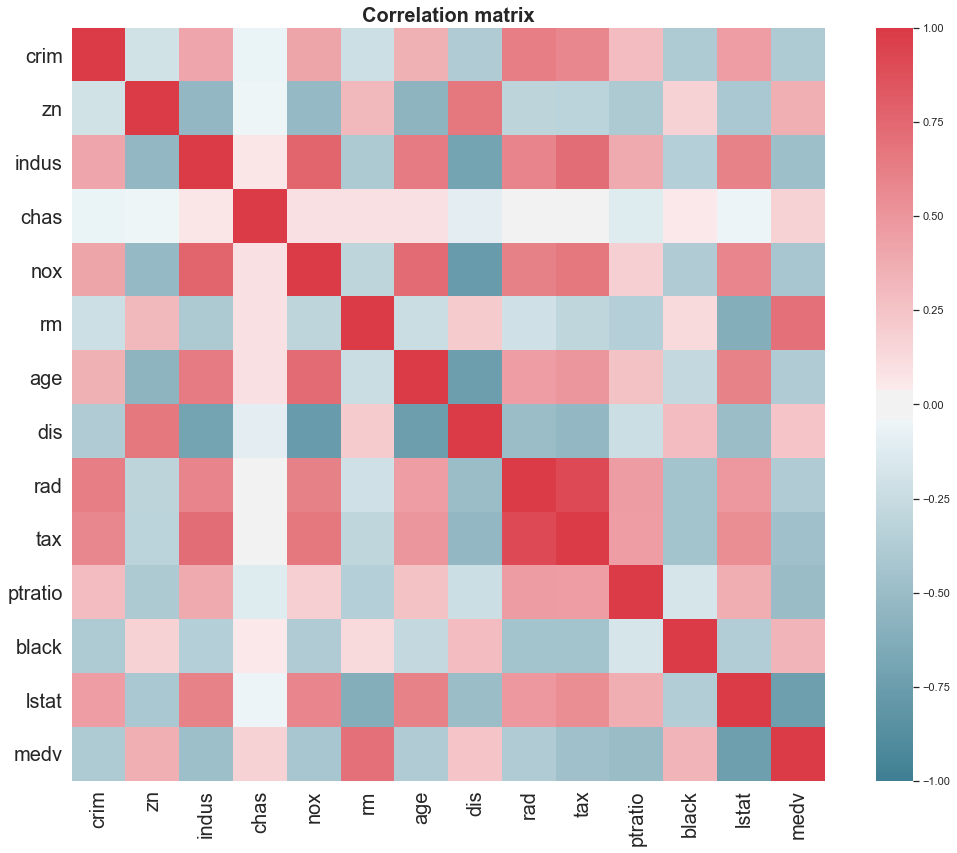

In [30]:
from pandas.api.types import is_numeric_dtype

fig, ax = plt.subplots()

cmap = sns.diverging_palette(220, 10, as_cmap= True)
sns.heatmap(data.corr(), vmax=1, vmin=-1, center=0, square=True, ax=ax, cmap=cmap)
ax.set_title('Correlation matrix', fontweight='bold', fontsize=20)
plt.tight_layout()
fig.set_size_inches(15,15)
plt.xticks(np.arange(0.5,len(data.columns),1),data.columns,fontsize=20)
plt.yticks(np.arange(0.5,len(data.columns),1),data.columns,fontsize=20)
# plt.savefig('house_correlation matrix.png')

In [31]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


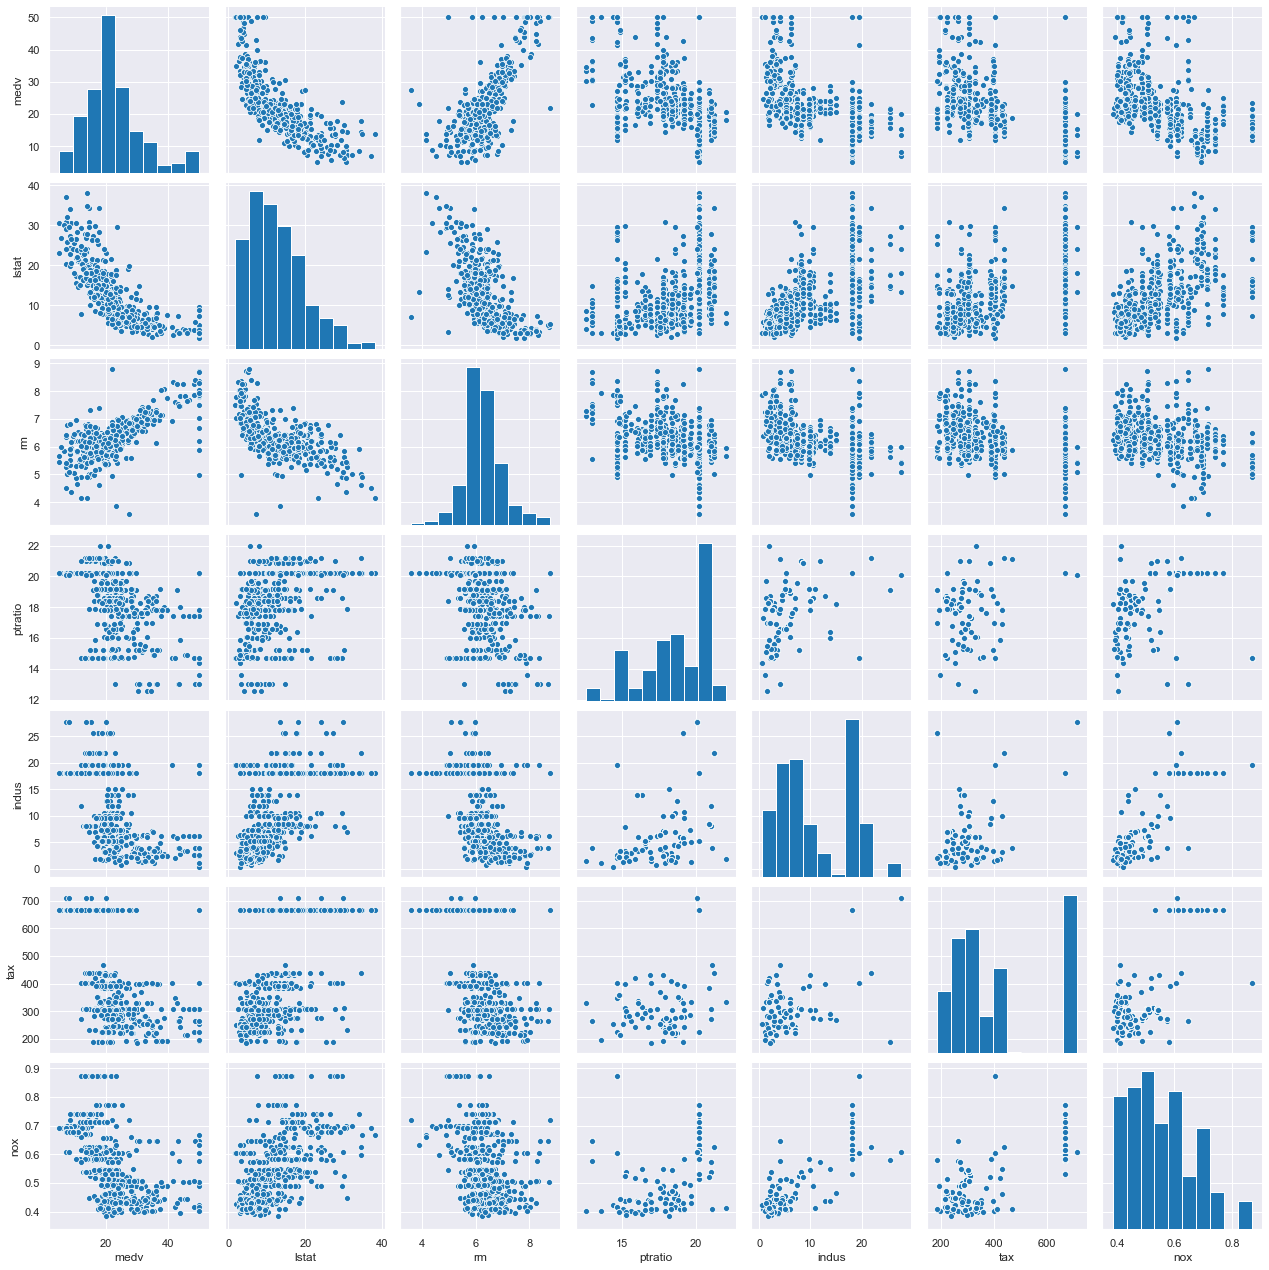

In [32]:
features = data[['medv','lstat','rm','ptratio','indus','tax','nox']]
sns.pairplot(features)
plt.show()

In [33]:
correlation = data.corr().round(4)['medv']
absolute = abs(correlation)
corr = pd.DataFrame({'Correlation coefficient with medv':correlation,
                    'Absolute coefficient':absolute})
corr.sort_values('Absolute coefficient')
# corr.colnames = ['Correlation coefficients with medv','']

,Correlation coefficient with medv,Absolute coefficient
chas,0.1753,0.1753
dis,0.2499,0.2499
black,0.3335,0.3335
zn,0.3604,0.3604
age,-0.3770,0.3770
rad,-0.3816,0.3816
crim,-0.3883,0.3883
nox,-0.4273,0.4273
tax,-0.4685,0.4685
indus,-0.4837,0.4837


# Gradient ascent algorithm

In [34]:
"""
Build the gradient ascent function for MLE
"""
# m denotes the number of training examples here, not the number of features
def Gradient_Aescent_Algo(X, y, beta, alpha, numIterations):
    # sample size
    N = len(X) 
    
    XTrans = X.transpose()
    # create a vector to save all the likelihood values at each iteration
             
    likelihood_values = np.zeros((numIterations,1))
    beta_values = np.zeros((numIterations, 4))
    
    for i in range(0, numIterations):
        
        # predicted values from the model
        f_X = np.dot(X, beta)

        # calculte the likelihood
        L = -1/(2*N)*np.sum((y-f_X)**2)
        
        # save all the likelihood values at each iteration
        likelihood_values[i][0] = L

        # calcualte the gradient using matrix representation
        
        gradient = 1/N*np.dot(np.transpose(X),(y-f_X))
            
        # update the parameters simulteneously with learning rate 

        beta = beta + alpha * gradient

        # save all the estimated parametes at each step
        beta_values[i,:]= beta.transpose()

    return beta, likelihood_values, beta_values

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

beta = np.zeros((4,1))
alphas = [0.001,0.01,0.1,1]

kf = KFold(len(X))

cv_scores = []
for alpha in alphas:
    
    scores = []
    
    for train_indices, valid_indices in kf.split(X):
        x_cvtrain = X[train_indices]
        x_cvvalid = X[valid_indices]
        
        y_cvtrain = y[train_indices]
        y_cvvalid = y[valid_indices]
        
        beta, likelihood_values, beta_values = Gradient_Aescent_Algo(x_cvtrain, y_cvtrain, beta, alpha, 500)

        y_cvpred = np.dot(x_cvvalid,beta)
        
        error = mean_squared_error(y_cvvalid, y_cvpred)
        
        scores.append(error)
        
        cv_score = np.mean(scores)
    
    cv_scores.append([alpha,cv_score.round(4)])
    
cv_scores = pd.DataFrame(cv_scores,columns=['Learning rate','CV scores: Root mean square error']).sort_values('CV scores: Root mean square error')

In [36]:
cv_scores

,Learning rate,CV scores: Root mean square error
0,0.001,0.4447
1,0.010,0.4485
2,0.100,0.4485
3,1.000,0.4485
